In [10]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling3D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model

In [50]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [13]:
y_train[0]

5

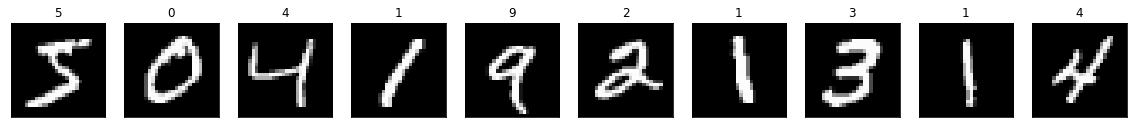

In [14]:
fig, axes = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = (20,4))

for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i], cmap = "gray")
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [24]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [35]:
#utils.plot_model(model, show_shapes = True)

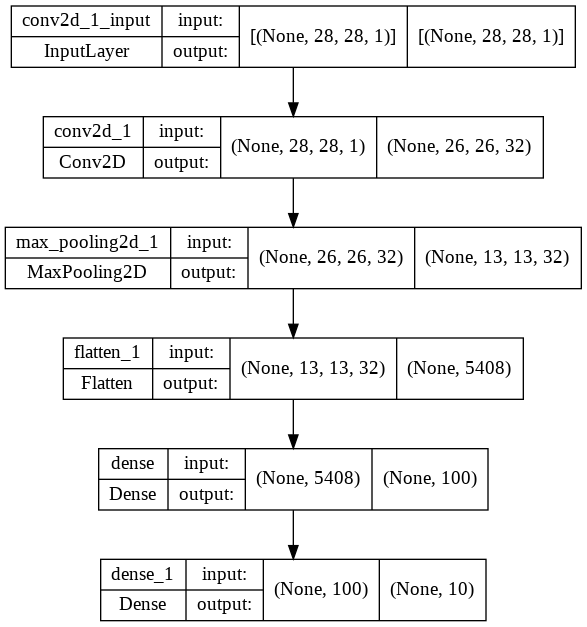

In [36]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, batch_size = 32, epochs = 5, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0565 - val_accuracy: 0.9845
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0566 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0556 - val_accuracy: 0.9862
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0741 - val_accuracy: 0.9842
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0669 - val_accuracy: 0.9848


In [43]:
model.save("mnist_cnn_model.h5")

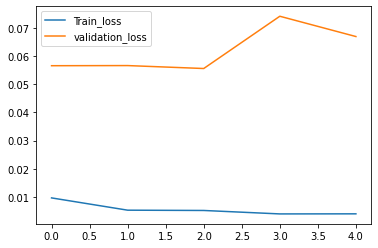

In [44]:
plt.plot(model.history.history['loss'], label = 'Train_loss')
plt.plot(model.history.history['val_loss'], label = 'validation_loss')
plt.legend()

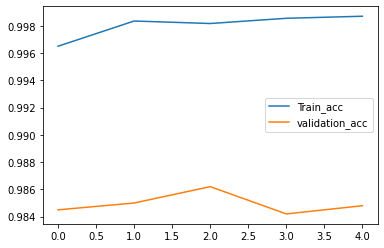

In [45]:
plt.plot(model.history.history['accuracy'], label = 'Train_acc')
plt.plot(model.history.history['val_accuracy'], label = 'validation_acc')
plt.legend()

In [48]:
model = keras.models.load_model('mnist_cnn_model.h5')

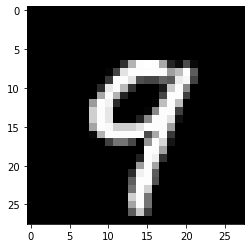

In [56]:
plt.imshow(X_test[12], cmap = 'gray')

In [57]:
x = np.reshape(X_test[12], (1, 28, 28, 1))

np.argmax(model.predict(x))

9

In [58]:
model.predict(x) # probabilities

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)